In [ ]:
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.2 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from rasterio.plot import reshape_as_image
import rasterio as rio

In [ ]:
# Lendo imagem
with rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif') as src:
  meta = src.meta
  img = reshape_as_image(src.read())

In [ ]:
# Reformatando dimensões
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [ ]:
# Calculando métrica
K = range(1, 10)
distortions = [KMeans(n_clusters=k).fit(X).inertia_ for k in K]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

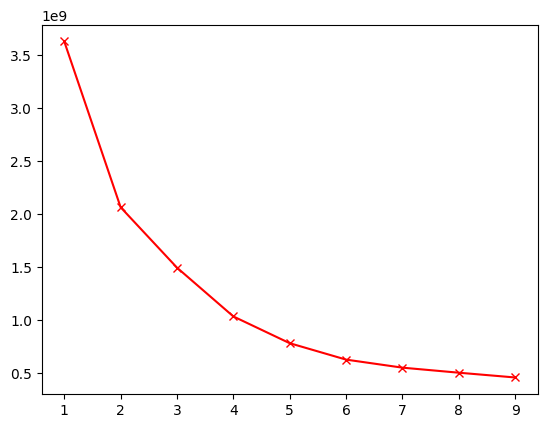

In [ ]:
# Visualizando gráfico
plt.plot(K, distortions, 'rx-')
plt.show()

In [ ]:
#Rodando Kmeans
k_means = KMeans(n_clusters=6, max_iter=30, random_state=10)
k_means.fit(X)

labels = k_means.labels_
pred = labels.reshape(img[:,:,0].shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


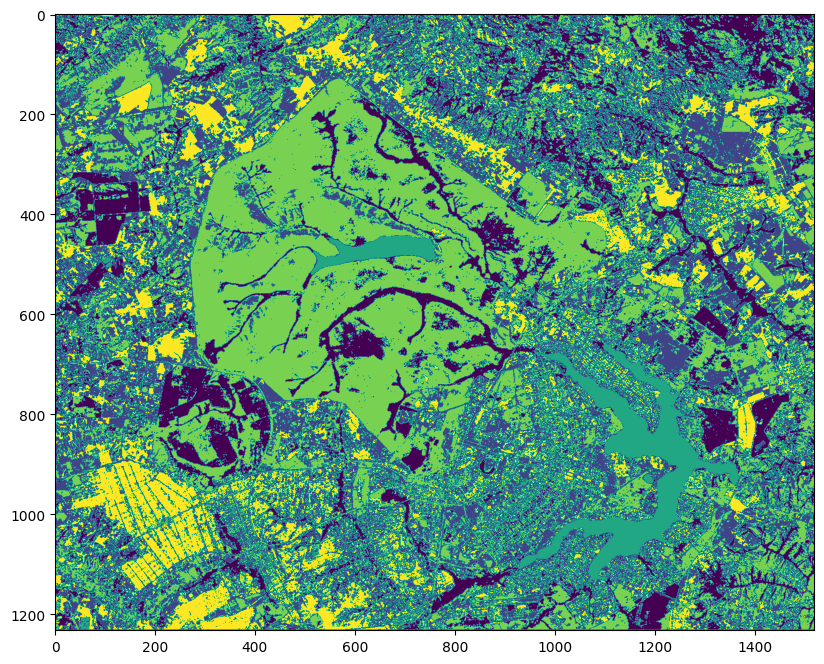

In [ ]:
#Visualizando resultado
plt.figure(figsize=(12,8))
plt.imshow(pred)